# 図 3.4 の生成

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def eta(K):
    n, m = K.shape
    return np.max((K.reshape(n, 1, m, 1) * K.reshape(1, n, 1, m)) / (K.reshape(1, n, m, 1) * K.reshape(n, 1, 1, m)))

In [3]:
def lam(K):
    e = eta(K)
    return (np.sqrt(e) - 1) / (np.sqrt(e) + 1)

In [4]:
def dH(x, y):
    r = np.log(x) - np.log(y)
    return np.max(r) - np.min(r)

45
35
33
73
554


Text(0, 0.5, '$d_H(\\mathbf{u}^{(k)}, \\mathbf{u}^*)$')

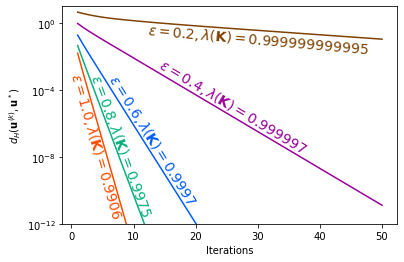

In [5]:
np.random.seed(1)
C = np.random.randn(100, 100) # データの生成

fig, ax = plt.subplots()
cols = ['#ff4b00', '#03af7a', '#005aff', '#990099', '#804000']
xs = [4, 8, 13, 26, 30]
ys = [5e-8, 5e-8, 1e-7, 1e-5, 1e-1]
rot = [-74, -70, -58, -31, -5]
frmt = ['.4f', '.4f', '.4f', '.6f', '.12f']
for i, eps in enumerate([1.0, 0.8, 0.6, 0.4, 0.2]):
    n, m = C.shape
    a = np.ones(n) / n
    b = np.ones(m) / m
    K = np.exp(- C / eps)

    # シンクホーンアルゴリズム（アルゴリズム 3.2）
    us = []
    u = np.ones(n)
    while True:
        v = b / (K.T @ u)
        u = a / (K @ v)
        us.append(u)
        if len(us) >= 2 and dH(us[-1], us[-2]) < 1e-36:
            print(len(us))
            break

    dHs = [dH(u, us[-1]) for u in us]
    
    l = min(len(dHs), 50)
    ax.plot(np.arange(1, l+1), dHs[:l], c=cols[i])
    ax.text(
        xs[i],
        ys[i],
        '$\epsilon = {}, \lambda(\mathbf{{K}}) = '.format(eps) + format(lam(K), frmt[i]) + '$',
        fontsize=14,
        c=cols[i],
        ha='center',
        va='center',
        rotation=rot[i]
    )
ax.set_yscale('log')
ax.set_ylim(1e-12, 10)
xvalues = [0, 10, 20, 30, 40, 50]
ylabels_exp = [0, -4, -8, -12]
yvalues = [10 ** y for y in ylabels_exp]
ylabels = ['$10^{' + str(i) + '}$' for i in ylabels_exp]
ax.set_xticks(xvalues)
ax.set_xticklabels(xvalues)
ax.set_yticks(yvalues)
ax.set_yticklabels(ylabels)
ax.set_xlabel('Iterations')
ax.set_ylabel('$d_H(\mathbf{u}^{(k)}, \mathbf{u}^*)$')